In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-04-07 06:13:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 192.178.163.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   192MB/s    in 0.5s    

2025-04-07 06:13:56 (192 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# !unzip /content/pizza_steak.zip

In [ ]:
# zip_ref = zipfile.ZipFile('/content/pizza_steak.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

In [ ]:
with zipfile.ZipFile('/content/pizza_steak.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls /content/pizza_steak/test

pizza  steak


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('/content/pizza_steak'):
  print(f"There are {len(dirnames)} dictionaries and {len(filenames)} images in '{dirpath}'.")

There are 2 dictionaries and 0 images in '/content/pizza_steak'.
There are 2 dictionaries and 0 images in '/content/pizza_steak/test'.
There are 0 dictionaries and 250 images in '/content/pizza_steak/test/pizza'.
There are 0 dictionaries and 250 images in '/content/pizza_steak/test/steak'.
There are 2 dictionaries and 0 images in '/content/pizza_steak/train'.
There are 0 dictionaries and 750 images in '/content/pizza_steak/train/pizza'.
There are 0 dictionaries and 750 images in '/content/pizza_steak/train/steak'.


In [ ]:
num_steak_images_train = len(os.listdir('/content/pizza_steak/train/pizza'))
num_steak_images_train

750

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib

def view_random_image(target_dir, target_class):
  target_folder = pathlib.Path(target_dir)/target_class
  random_image = random.sample(os.listdir(target_folder),1)
  path = target_folder/random_image[0]
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape: {img.shape}")

Image shape: (384, 512, 3)


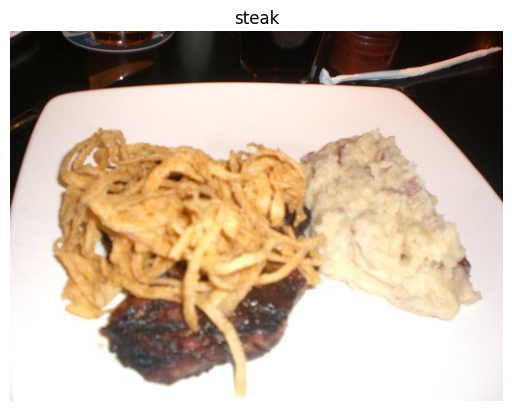

In [ ]:
view_random_image(target_dir = '/content/pizza_steak/train/', target_class = 'steak')

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode='binary',
                                                                  image_size = IMG_SIZE,
                                                                  shuffle = True, crop_to_aspect_ratio = True,
                                                                  batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode='binary',
                                                                  image_size=IMG_SIZE,
                                                                  crop_to_aspect_ratio=True)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[224,224,3]),
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(momentum=0.9),
              metrics=['accuracy'])
model.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5181 - loss: 0.7860 - val_accuracy: 0.5000 - val_loss: 0.6820
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.5580 - loss: 0.6827 - val_accuracy: 0.7220 - val_loss: 0.5714
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.6762 - loss: 0.6334 - val_accuracy: 0.7440 - val_loss: 0.5136
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.6531 - loss: 0.6302 - val_accuracy: 0.7560 - val_loss: 0.5354
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.7308 - loss: 0.5671 - val_accuracy: 0.7860 - val_loss: 0.4521


In [ ]:
model.evaluate(train_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.7829 - loss: 0.4742


[0.47704988718032837, 0.781333327293396]

In [ ]:
model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7821 - loss: 0.4510


[0.4520935118198395, 0.7860000133514404]

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomHeight(0.1),
    tf.keras.layers.RandomWidth(0.1)
])

In [ ]:
class_names = train_data.class_names
class_names

['pizza', 'steak']

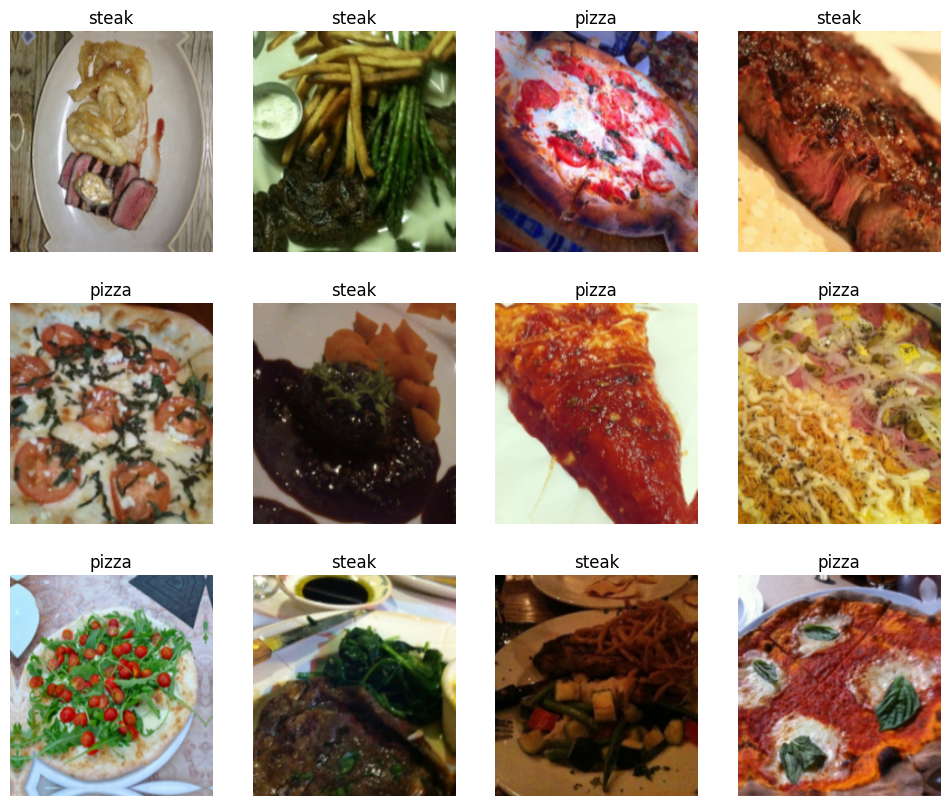

In [ ]:
plt.figure(figsize=(12,10))
for images,labels in train_data.take(1):
  augmented_images = data_augmentation(images)
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(augmented_images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i].numpy().astype('uint')[0]])
    plt.axis('off')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[224,224,3]),
    data_augmentation,
    tf.keras.layers.Resizing(224,224),
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0003, momentum=0.9),
              metrics=['accuracy'])
model.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.5212 - loss: 0.8552 - val_accuracy: 0.7300 - val_loss: 0.6188
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.6309 - loss: 0.6430 - val_accuracy: 0.7800 - val_loss: 0.5506
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.6891 - loss: 0.5995 - val_accuracy: 0.7660 - val_loss: 0.5261
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - accuracy: 0.6711 - loss: 0.6092 - val_accuracy: 0.7500 - val_loss: 0.5318
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.6950 - loss: 0.5648 - val_accuracy: 0.7680 - val_loss: 0.5058


In [ ]:
base_model = tf.keras.applications.ResNet50(include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(avg)
model = tf.keras.Model(inputs = base_model.inputs, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.training = False

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 47,
    decay_rate = 0.96
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                 patience=3,
                                                 restore_best_weights=True)
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9),
              metrics  = ['accuracy'])
model.fit(train_data, validation_data=test_data, epochs=15, callbacks=early_stopping)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_44']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 937ms/step - accuracy: 0.8390 - loss: 0.3479 - val_accuracy: 0.9680 - val_loss: 0.1531
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.9526 - loss: 0.1157 - val_accuracy: 0.9460 - val_loss: 0.1438
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 315ms/step - accuracy: 0.9787 - loss: 0.0486 - val_accuracy: 0.9660 - val_loss: 0.1209
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.9959 - loss: 0.0165 - val_accuracy: 0.9880 - val_loss: 0.0462
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9860 - val_loss: 0.0452
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 336ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9920 - val_loss: 0.0323
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9900 - val_loss: 0.0381
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 1.0000 - loss: 8.6926e-04 - val_accuracy: 0

In [ ]:
inputs = tf.keras.layers.Input(shape=(224,224,3))

x=data_augmentation(inputs)
x=tf.keras.applications.resnet50.preprocess_input(x)
base_model = tf.keras.applications.ResNet50(include_top=False)(x)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model)
output = tf.keras.layers.Dense(1, activation='sigmoid')(avg)
model = tf.keras.Model(inputs=inputs, outputs=output)

In [ ]:
base_model.training=False

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 47,
    decay_rate = 0.96
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                 patience=3,
                                                 restore_best_weights=True)
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9),
              metrics  = ['accuracy'])
model.fit(train_data, validation_data=test_data, epochs=15, callbacks=early_stopping)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8056 - loss: 0.4161 - val_accuracy: 0.7160 - val_loss: 1.7726
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9170 - loss: 0.1773 - val_accuracy: 0.9020 - val_loss: 0.8407
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9491 - loss: 0.1293 - val_accuracy: 0.9520 - val_loss: 0.3184
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9817 - loss: 0.0473 - val_accuracy: 0.9800 - val_loss: 0.1033
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 885ms/step - accuracy: 0.9925 - loss: 0.0271 - val_accuracy: 0.9900 - val_loss: 0.0269
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 848ms/step - accuracy: 0.9862 - loss: 0.0381 - val_accuracy: 0.9720 - val_loss: 0.1065
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 868ms/step - accuracy: 0.9922 - loss: 0.0188 - val_accuracy: 0.9520 - val_loss: 0.1690
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 843ms/step - accuracy: 0.9913 - loss: 0.0334 - val_accuracy: 0.970